# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов






-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set3')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [31]:
airData =  pd.read_csv("airquality.csv")
airData.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [32]:
airData.describe().apply(lambda x: round(x, 2))

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** 

Для предположения о наличии выбросов сравним медиану и среднее значение(см ячейку ниже).

Согласно этим данным предположу, что выбросы присутствуют в колонках $Solar.R$ и $Ozone$

In [33]:
targetColumns = ["Ozone", "Solar.R", "Wind", "Temp"]

for name, column in airData[targetColumns].iteritems():
    print(f"{name} mean is: {column.mean():.2f} \t and median is: {column.median():.2f}")
    print("Процентная разница = {:.0f}%".format(200 * np.abs(column.mean() - column.median()) / \
                                                         (column.mean() + column.median())))

Ozone mean is: 42.13 	 and median is: 31.50
Процентная разница = 29%
Solar.R mean is: 185.93 	 and median is: 205.00
Процентная разница = 10%
Wind mean is: 9.96 	 and median is: 9.70
Процентная разница = 3%
Temp mean is: 77.88 	 and median is: 79.00
Процентная разница = 1%


/tmp/ipykernel_108564/266508719.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in airData[targetColumns].iteritems():


**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

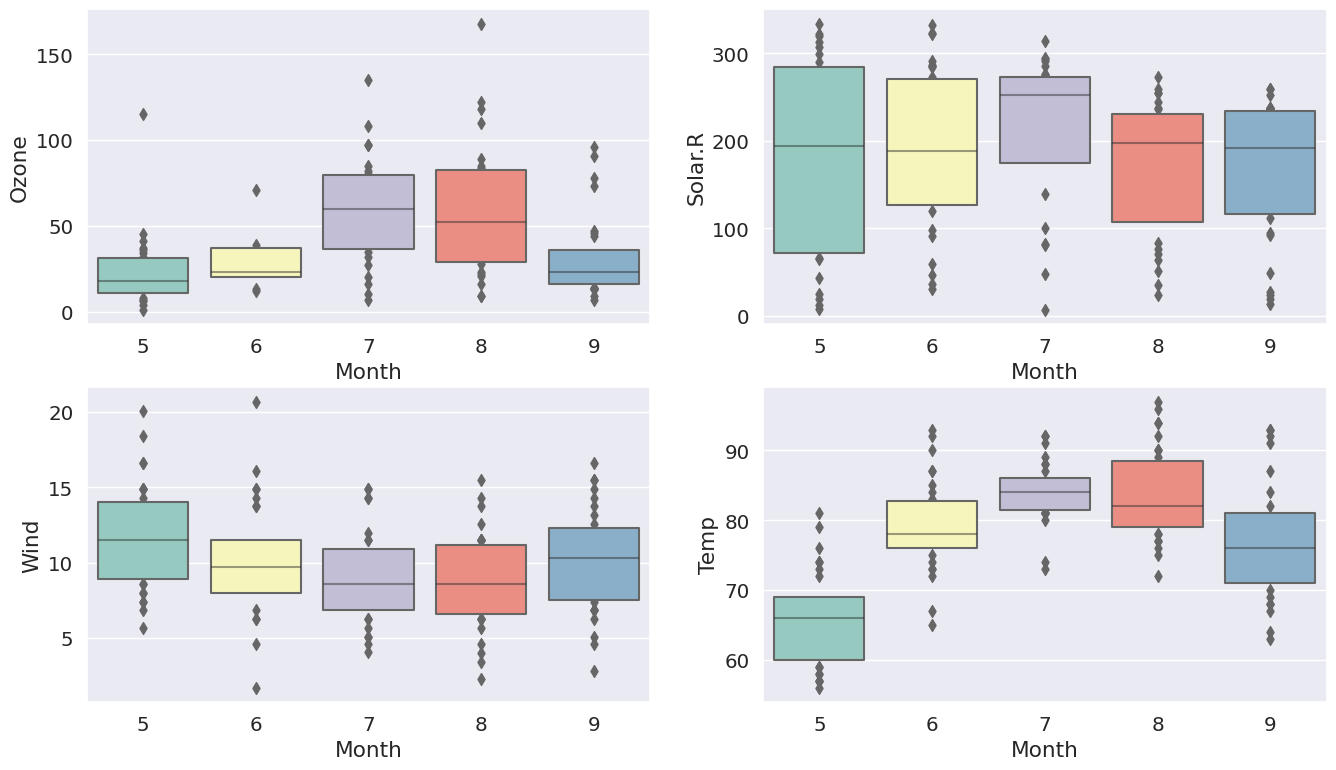

In [34]:

fig, ax = plt.subplots(2, 2, figsize = (16,9), dpi = 100)

for ind, column in enumerate(targetColumns):
    indX, indY = ind // 2, ind % 2
    sns.boxenplot(data = airData,
                  x = "Month", 
                  y = column,
                  ax = ax[indX, indY])
    # ax[indX, indY].axhline(np.mean(airData[column]),
    #                        alpha = 0.7,
    #                        color = 'pink',
    #                        label = 'Среднее')
    # ax[indX, indY].legend()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [35]:
print("Колонка Ozone - медиана = {:.2f}, среднее = {:.2f}".format(np.nanmedian(airData.Ozone),
                                                                  np.nanmean(airData.Ozone)))

Колонка Ozone - медиана = 31.50, среднее = 42.13


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:**


При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?


In [75]:
airData[targetColumns].corr().round(1)

,Ozone,Solar.R,Wind,Temp
Ozone,1.0,0.3,-0.6,0.7
Solar.R,0.3,1.0,-0.1,0.3
Wind,-0.6,-0.1,1.0,-0.5
Temp,0.7,0.3,-0.5,1.0


<Axes: >

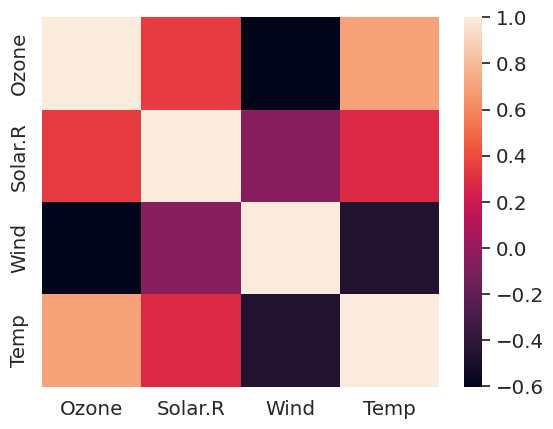

In [76]:
sns.heatmap(airData[targetColumns].corr())

**Ответ:**

Для ответа на вопрос, посчитаем коэффициенты корреляции(см. ячейку ниже). Как видим рассматриваемые величины зависят друг от друга, так как коэффициент корреляции сильно превышает 0.

Например, концентрация озона возрастает с ростом температуры(звучит логично по крайней мере) - $\rho_{Ozone \ v \ Temp} = 0.7$. 

Еще более логичный пример - падение температуры в более ветренную погоду $\rho_{Wind \ v \ Temp} = 0.5$

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:**

- Думаю, что зачастую эксперименты ставятся с целью найти зависимости между некоторыми параметрами. Поэтому параметры априоре должны считаться зависимыми, а независимость некоторого параметра от остальных говорит о возможности не учитывать его в проводимом эксперименте
- Для проверки можно испльзовать матрицу корреляции. Коэффициент корреляции это как косинус угла между двумя векторами. Он сразу даёт понимание о независимости(вектора перпендикулярны) и зависимости величин. Других способов нам на теорвере не показывали =)
- 

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

- `1.04` - Alcalinity of ash
- `2.8` - Nonflavanoid phenols
-  `

In [98]:
targetColumns = ["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]
wineData = pd.read_csv("wine.data")
wineData.rename({})
wineData.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Сделайте выводы по полученной таблице.

**Вывод:**

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

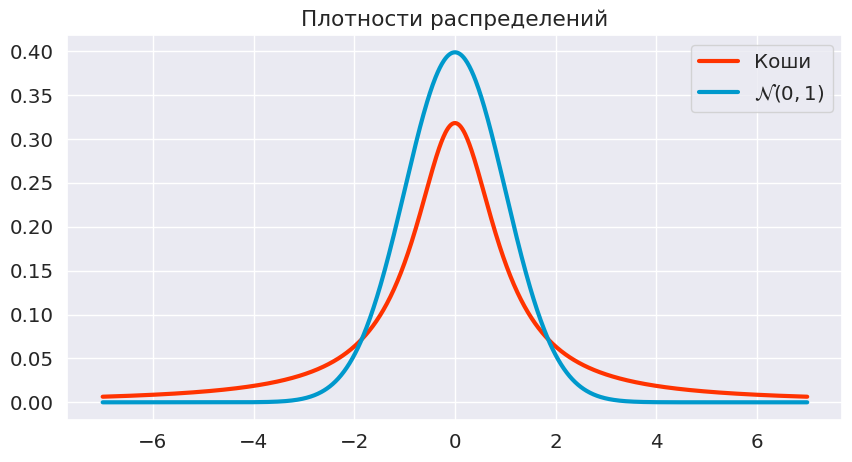

In [3]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [4]:
sample_count, sample_size = int(1e5), 30

sample = sps.norm.rvs(size = (sample_count, sample_size))
sample_means = np.mean(sample, axis = 1)

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

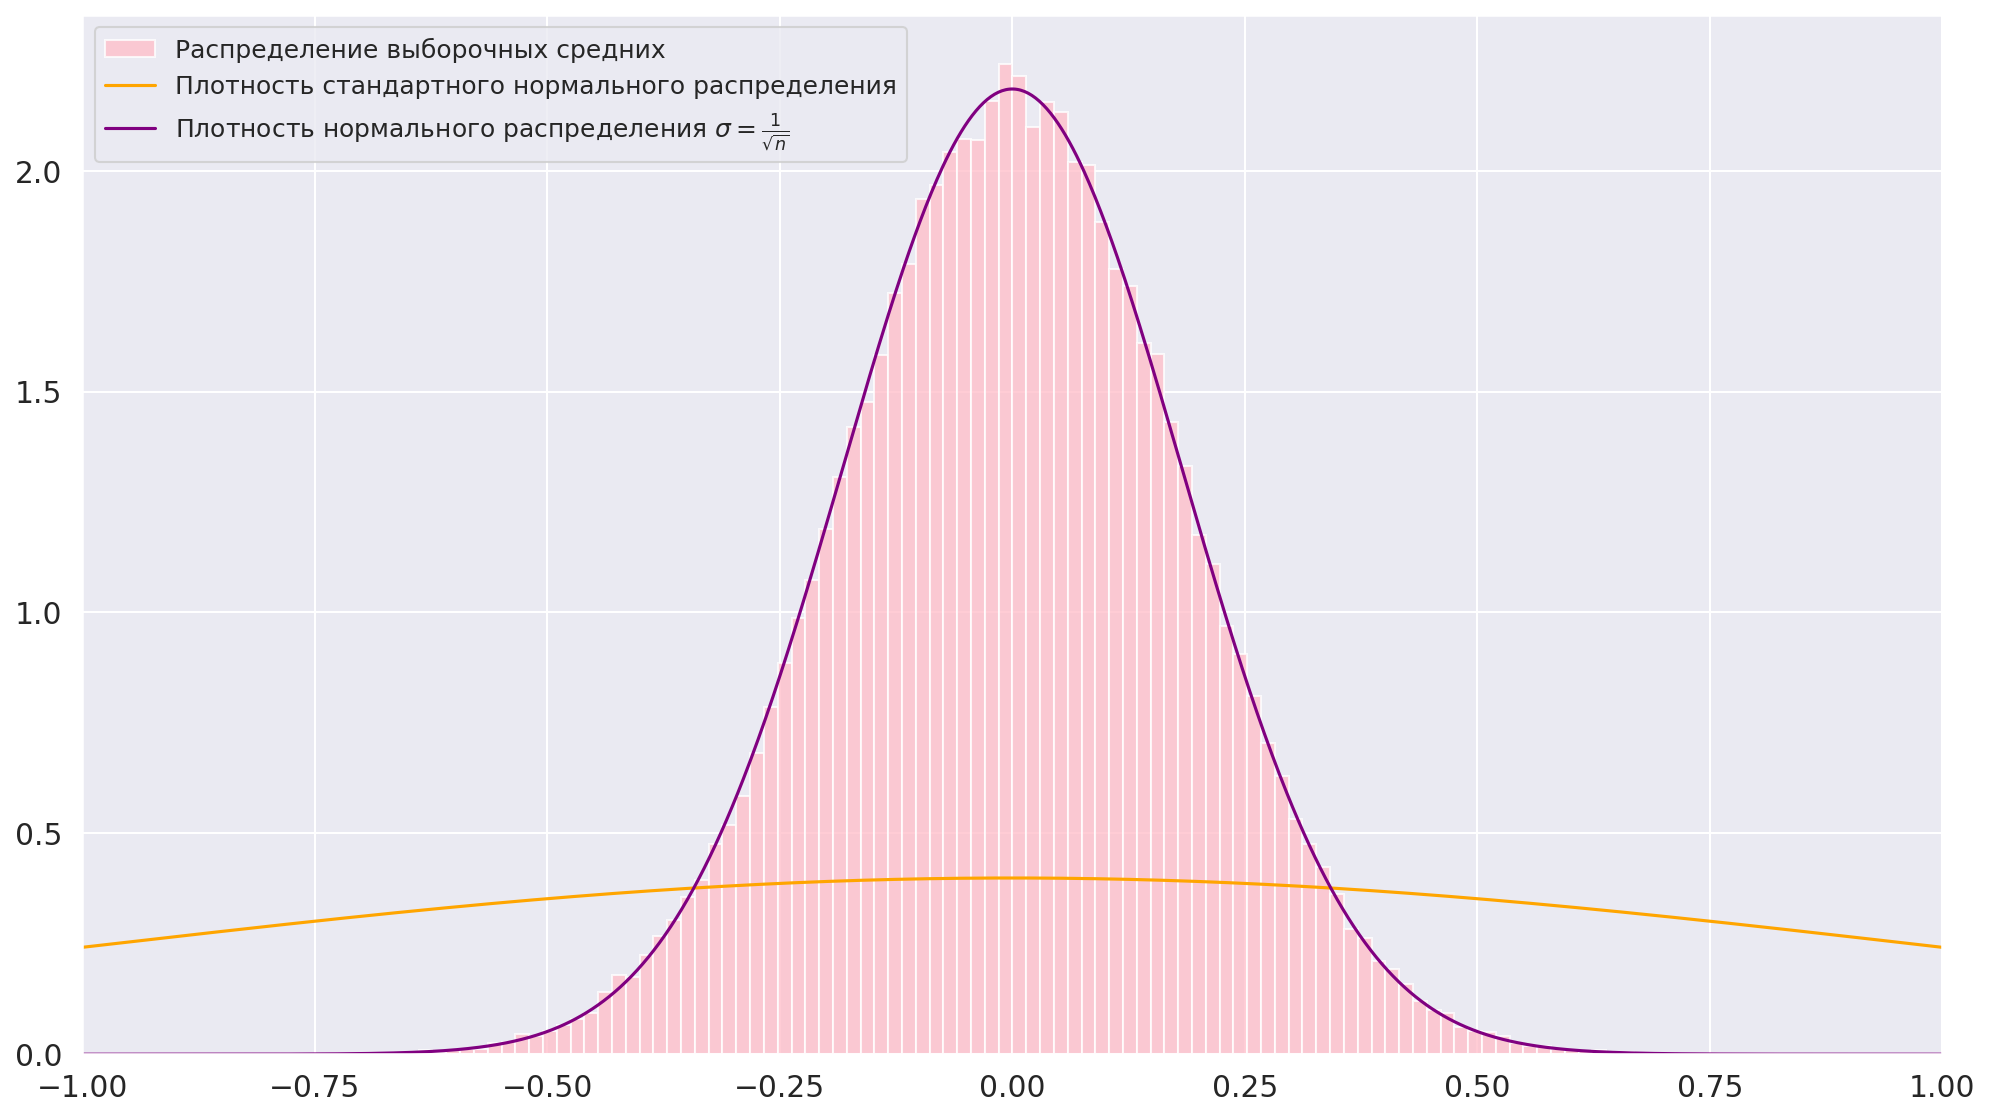

In [5]:
xAx = np.linspace(-1, 1, 1000)
norm_standart = sps.norm.pdf(xAx)
norm = sps.norm(scale = 1 / np.sqrt(sample_size), loc = 0).pdf(xAx)

plt.figure(figsize = (16, 9), dpi = 150)

plt.hist(sample_means, 
         density = True,
         color = 'pink',
         alpha = 0.8,
         label = 'Распределение выборочных средних',
         bins = 100)
plt.plot(xAx, 
         norm_standart, 
         label = "Плотность стандартного нормального распределения",
         color = 'orange')
plt.plot(xAx,
         norm,
         label = r"Плотность нормального распределения $\sigma = \frac{1}{\sqrt{n}}$",
         color = 'purple')

plt.xlim(-1, 1)
plt.legend(loc = 'upper left',
           fontsize = 12);

**Вывод:**

Выборочное среднее нормально распределенных случайных величин имеет нормальное распределение - проиллюстрированно на <span style = "color:pink"> розовой </span> гистограмме.

Параметры этого распределения могут быть найдены из **ЦПТ**:
$$
\sqrt{n} \frac{\overline{X_{n}} - \operatorname{E}{X_{1}}}{\sigma} \to N(0,1)
$$

В нашей задаче $\operatorname{E}{X_{1}} = 0, \ \sigma = 1$, а значит $\overline{X_{n}} \to N(0, 1/\sqrt{n})$(проиллюстрированно на <span style = "color:purple"> фиолетовом </span> графике)

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [12]:
sample_count, sample_size = int(1e5), 30

sample = sps.cauchy.rvs(size = (sample_count, sample_size))
sample_means = np.mean(sample, axis = 1)

Построим аналогичный график. 

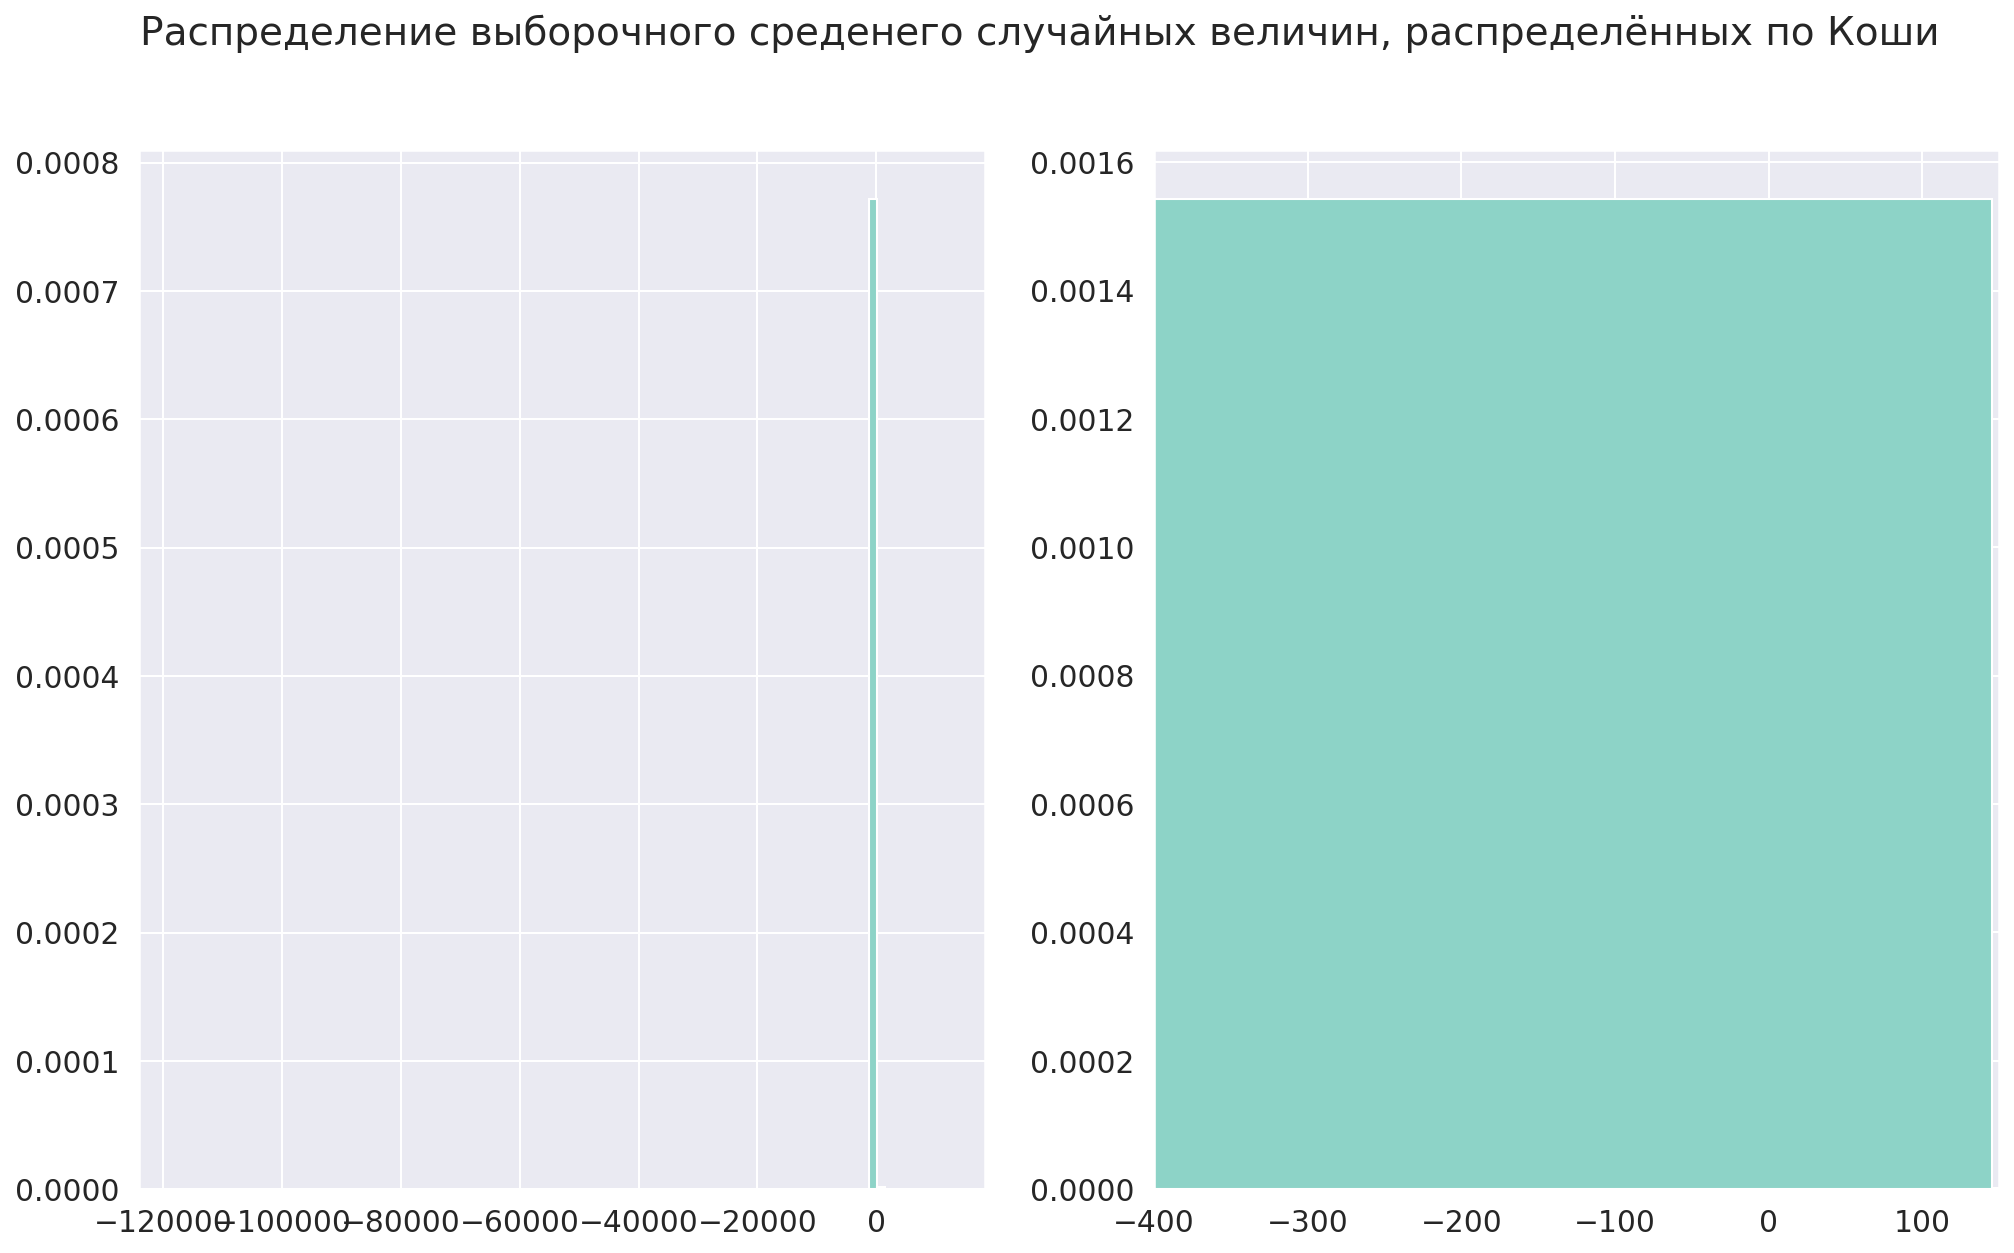

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (16,9), dpi = 150)

ax[0].hist(sample_means,
           density = True,
           bins = 100)

ax[1].hist(sample_means,
           density = True,
           bins = 200)

ax[1].set_xlim(-400, 150)
fig.suptitle("Распределение выборочного среденего случайных величин, распределённых по Коши");

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**

Кажется, что распределение выборочных средних случайных величин, распределённых по Коши - равномерное. 

Возможно это связано с тем, что выборочное среднее в случае распределения Коши не приближает никакого реального парметра. Поэтому оно равновероятно принимает любое значение.

ЦПТ для распределения Коши не сработло =(